In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [11]:
url = '../../data/clean/df_complete.csv'
df_complete = pd.read_csv(url)
df_complete.columns

Index(['client_id', 'visitor_id', 'visit_id', 'start_time', 'confirm_time',
       'total_time_spent', 'Variation_x', 'clnt_tenure_yr', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation_y',
       'gender_dichotomic'],
      dtype='object')

In [14]:
# Create a new dichotomic column, where 'Test' becomes 0 and Control become 0
df_complete['group_dichotomic'] = df_complete['Variation_y'].apply(lambda x: 1 if x == 'Test' else 0)
df_complete

,client_id,visitor_id,visit_id,start_time,confirm_time,total_time_spent,Variation_x,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation_y,gender_dichotomic,group_dichotomic
0,1936,883992205_24100452548,943469853_76229226125_839996,2017-03-29 12:52:48,2017-03-29 12:55:56,188.0,Test,5.0,26.5,2.0,52447.90,6.0,9.0,Test,0,1
1,4484,929634148_40943099576,66056328_29973355596_981576,2017-04-05 20:40:10,2017-04-05 20:52:35,745.0,Test,16.0,48.5,2.0,51499.77,2.0,5.0,Test,0,1
2,6985,157368510_91928042506,702486929_79839403728_901057,2017-04-16 14:19:15,2017-04-16 14:24:46,331.0,Control,7.0,61.5,3.0,84975.60,6.0,9.0,Control,0,0
3,7020,131463516_45910398094,61344667_49617029714_100250,2017-04-08 10:23:38,2017-04-08 10:21:43,-115.0,Control,16.0,41.5,2.0,63648.09,2.0,5.0,Control,1,0
4,7657,591719386_90464616750,155200945_99956206989_392959,2017-04-05 12:43:34,2017-04-05 12:45:11,97.0,Test,18.0,41.5,2.0,55643.37,2.0,5.0,Test,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,9994115,434880129_22821511966,529543040_50025576470_13273,2017-05-03 15:58:45,2017-05-03 16:02:52,247.0,Test,20.0,53.5,3.0,134233.63,4.0,7.0,Test,1,1
7479,9994764,208048562_5591648325,945115982_5995160722_563889,2017-04-24 12:19:59,2017-04-24 12:37:17,1038.0,Test,5.0,30.5,2.0,58258.46,6.0,9.0,Test,0,1
7480,9996404,336369837_4061930799,943539475_90967917948_823342,2017-03-29 12:00:01,2017-03-29 12:23:03,1382.0,Control,10.0,30.5,3.0,130631.12,6.0,9.0,Control,0,0
7481,9997470,395791369_55562604618,761490147_96352537762_21814,2017-05-09 15:56:18,2017-05-09 16:39:34,2596.0,Control,6.0,36.0,2.0,53543.03,0.0,3.0,Control,0,0


In [18]:
# Define the dependent and independent variables
X = df_complete[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal','calls_6_mnth', 'logons_6_mnth', 'gender_dichotomic', 'group_dichotomic']] 
Y = df_complete['total_time_spent']  # dependent variable

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_time_spent   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     20.60
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.62e-31
Time:                        20:19:48   Log-Likelihood:                -59090.
No. Observations:                7483   AIC:                         1.182e+05
Df Residuals:                    7474   BIC:                         1.183e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               178.4054    112.43

In [20]:
df_complete[df_complete['client_id'] == 755076]
# Good time customer (Control)

,client_id,visitor_id,visit_id,start_time,confirm_time,total_time_spent,Variation_x,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation_y,gender_dichotomic,group_dichotomic
557,755076,780004113_76637405470,634631042_68603981172_308188,2017-06-09 01:32:17,2017-06-09 01:41:36,559.0,Control,16.0,36.0,3.0,102668.25,6.0,9.0,Control,1,0


In [22]:
df_complete[df_complete['client_id'] == 4647786]
# Worst time customer (Test)

,client_id,visitor_id,visit_id,start_time,confirm_time,total_time_spent,Variation_x,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation_y,gender_dichotomic,group_dichotomic
3424,4647786,3318623_72481547258,391696103_92230204739_479887,2017-04-15 11:07:47,2017-04-15 15:45:20,16653.0,Test,11.0,29.5,3.0,50662.24,1.0,4.0,Test,1,1


In [30]:
cross_table = pd.crosstab(df_complete['total_time_spent'], df_complete['group_dichotomic'], normalize='index')
cross_table

group_dichotomic,0,1
total_time_spent,,
-3926.0,0.0,1.0
-3580.0,0.0,1.0
-3287.0,1.0,0.0
-2777.0,1.0,0.0
-2427.0,1.0,0.0
...,...,...
6790.0,1.0,0.0
6822.0,0.0,1.0
6937.0,0.0,1.0


In [33]:
numerical_df = df_complete.select_dtypes(include='number')
corr_matrix = numerical_df.corr()

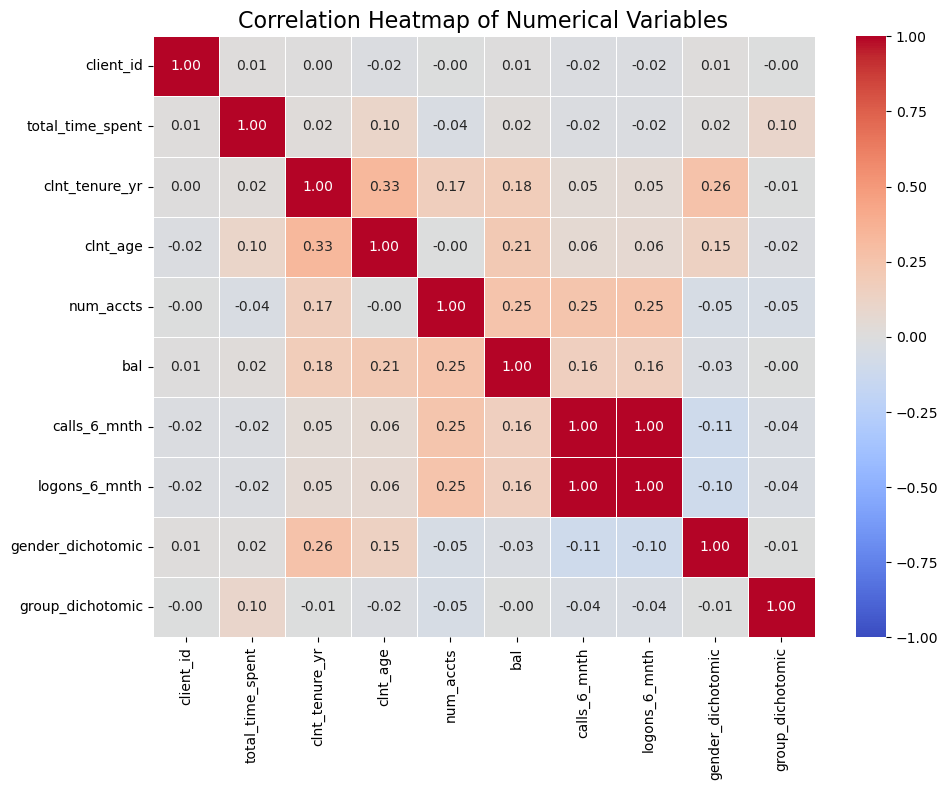

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Step 3: Customize the plot
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Remove the constant term (as it is not a predictor)
X_no_const = X.drop(columns=['const'])

# Compute the VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

# Print the VIF for each feature
print(vif_data)

             Feature         VIF
0     clnt_tenure_yr    5.075822
1           clnt_age   12.153922
2          num_accts   19.858320
3                bal    1.360095
4       calls_6_mnth   50.532067
5      logons_6_mnth  135.428756
6  gender_dichotomic    1.629783
7   group_dichotomic    2.624072


In [47]:
# Remove num_accts, calls and log-ons from the model 
X = df_complete[['clnt_tenure_yr', 'num_accts' ,'clnt_age', 'bal', 'gender_dichotomic', 'group_dichotomic']] 
Y = df_complete['total_time_spent']  # dependent variable

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_time_spent   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     27.19
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           2.96e-32
Time:                        20:39:27   Log-Likelihood:                -59090.
No. Observations:                7483   AIC:                         1.182e+05
Df Residuals:                    7476   BIC:                         1.182e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               223.5153     42.54

In [49]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_const)

# Recalculate the VIF on the scaled data
vif_scaled = pd.DataFrame()
vif_scaled['Feature'] = X_no_const.columns
vif_scaled['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_scaled)

             Feature         VIF
0     clnt_tenure_yr    1.242058
1           clnt_age    1.181586
2          num_accts    1.161826
3                bal    1.145143
4       calls_6_mnth  101.994768
5      logons_6_mnth  102.319846
6  gender_dichotomic    1.103896
7   group_dichotomic    1.003953


In [55]:
correlation_matrix = X_no_const[['calls_6_mnth', 'logons_6_mnth']].corr()
print(correlation_matrix)

               calls_6_mnth  logons_6_mnth
calls_6_mnth       1.000000       0.995041
logons_6_mnth      0.995041       1.000000


In [57]:
# Define the dependent and independent variables
X = df_complete[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal','logons_6_mnth', 'gender_dichotomic', 'group_dichotomic']] 
Y = df_complete['total_time_spent']  # dependent variable

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_time_spent   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     23.50
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           8.50e-32
Time:                        20:43:44   Log-Likelihood:                -59090.
No. Observations:                7483   AIC:                         1.182e+05
Df Residuals:                    7475   BIC:                         1.183e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               239.9678     44.87

In [59]:
X_no_const_reduced = X_no_const.drop(columns=['logons_6_mnth'])

# Recalculate VIF after removing 'logons_6_mnth'
vif_reduced = pd.DataFrame()
vif_reduced['Feature'] = X_no_const_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_no_const_reduced.values, i) for i in range(X_no_const_reduced.shape[1])]

print(vif_reduced)

             Feature       VIF
0     clnt_tenure_yr  5.075135
1           clnt_age  8.744525
2          num_accts  9.678337
3                bal  1.297872
4       calls_6_mnth  3.367971
5  gender_dichotomic  1.620558
6   group_dichotomic  2.445327
